<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

The criteria implemented come from [this paper](https://arxiv.org/pdf/1905.01067.pdf).

In [4]:
#| include: false
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *


import seaborn as sns

sns.set(context='poster', style='white',
        font='sans-serif', font_scale=1, color_codes=True, rc=None)

In [55]:
#| include: false
limit = np.linspace(-1, 1, 100)

def demo_model(criteria, sparsity=50):
    model = models.resnet18(weights="ResNet18_Weights.DEFAULT")
    
    #sp = Sparsifier(model, 'weight', 'local', criteria)
    
    pt = model.conv1.weight.clone().view(-1).detach().numpy()
    model.conv1._init_weights =  model.conv1.weight.clone()
    model.conv1.weight.data += 0.05*torch.randn(model.conv1.weight.shape)
    ft = model.conv1.weight.clone().view(-1).detach().numpy()
    
    
    pruned_weights = criteria(model.conv1)
    threshold = torch.quantile(pruned_weights.view(-1), sparsity/100)
    mask = pruned_weights.ge(threshold).to(dtype=pruned_weights.dtype)
    
    
    keep = np.where(mask.view(-1)==1)
    pruned = np.where(mask.view(-1)==0)
    fig, ax = plt.subplots(1, 1, figsize=(4,4), dpi=100)
    fig.patch.set_alpha(0.)
    ax.patch.set_alpha(0.)
    x1, x2, y1, y2 = -0.4, 0.4, -0.4, 0.4 # specify the limits
    ax.set_xlim(x1, x2) # apply the x-limits
    ax.set_ylim(y1, y2) # apply the x-limits
    ax.scatter(pt[pruned], ft[pruned], s=5, c='lightgrey')
    ax.scatter(pt[keep], ft[keep], s=5, c='#89d6c9')
    ax.plot(limit, limit, c='black', linestyle=':', linewidth=3)
    ax.set_xlabel("Pretrained Weights", fontsize=15)
    ax.set_ylabel("Fine-Tuned Weights", fontsize=15)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(2)
    plt.tick_params(axis='x', labelsize=15, width=2)
    plt.tick_params(axis='y', labelsize=15, width=2)
    ax.spines['bottom'].set_color('#808080')
    ax.spines['top'].set_color('#808080') 
    ax.spines['right'].set_color('#808080')
    ax.spines['left'].set_color('#808080')
    ax.tick_params(axis='x', colors='#808080')
    ax.tick_params(axis='y', colors='#808080')
    ax.yaxis.label.set_color('#808080')
    ax.xaxis.label.set_color('#808080')

In [1]:
#|output: asis
#| echo: false
show_doc(Criteria)

---

### Criteria

>      Criteria (f, needs_init=False, needs_update=False, output_f=None,
>                return_init=False)

Initialize self.  See help(type(self)) for accurate signature.

## Weight Based Criteria

### Random

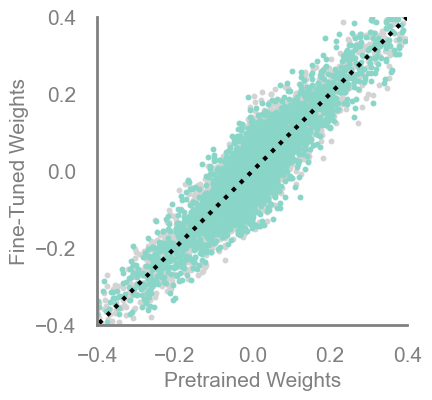

In [58]:
demo_model(random)

### Large Final Value

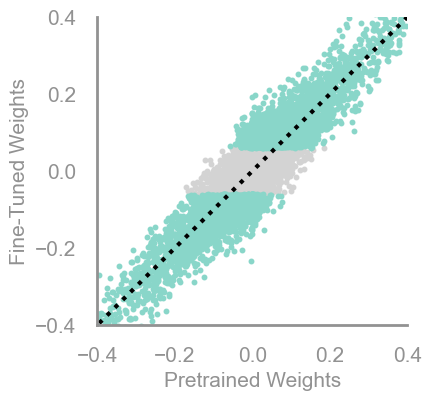

In [10]:
demo_model(large_final)

### Squared Final Value

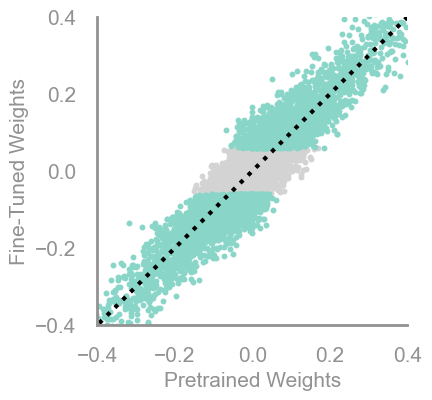

In [12]:
demo_model(squared_final)

### Small Final Value

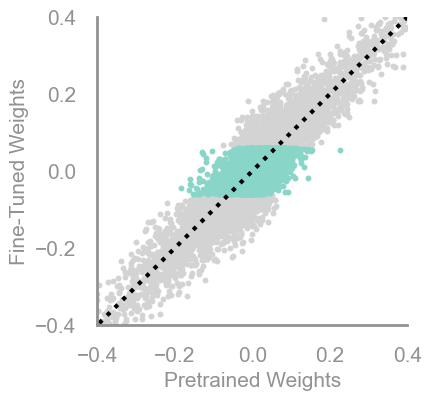

In [14]:
demo_model(small_final)

### Large Init Value

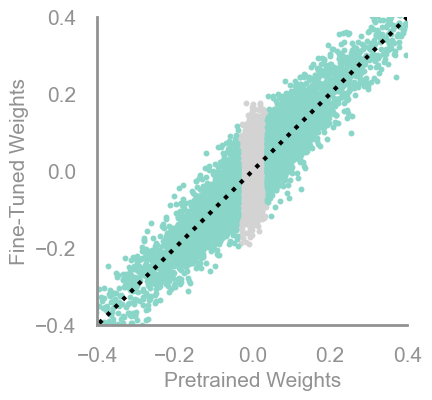

In [16]:
demo_model(large_init)

### Small Init Value

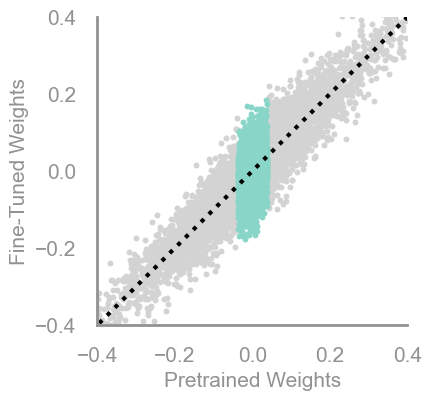

In [18]:
demo_model(small_init)

### Large Init Large Final Value

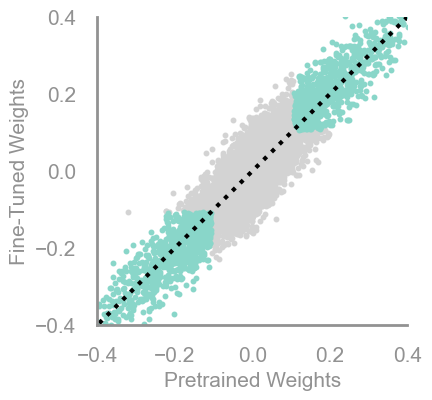

In [20]:
demo_model(large_init_large_final, 80)

### Small Init Small Final Value

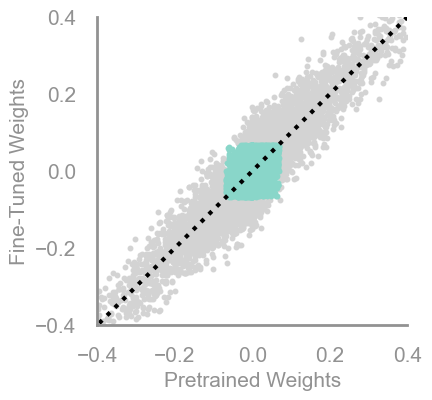

In [22]:
demo_model(small_init_small_final)

### Increasing Magnitude

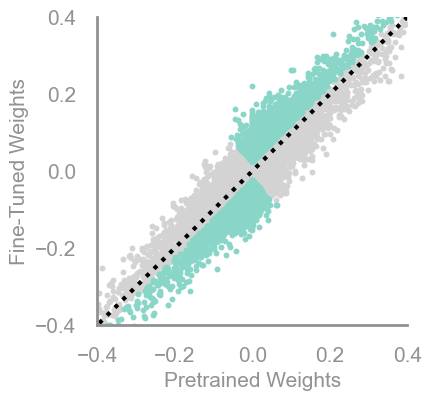

In [24]:
demo_model(magnitude_increase, 60)

### Movement Pruning

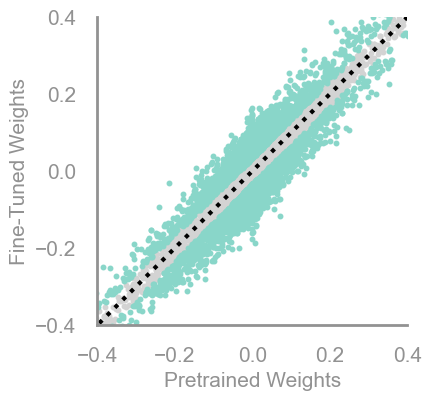

In [26]:
demo_model(movement)

## Updating Versions

The following criteria use an updating value of the weights, i.e. the value from the previous iteration of training, instead of the initialization value to better capture the training dynamics.

### Updating Magnitude Increase

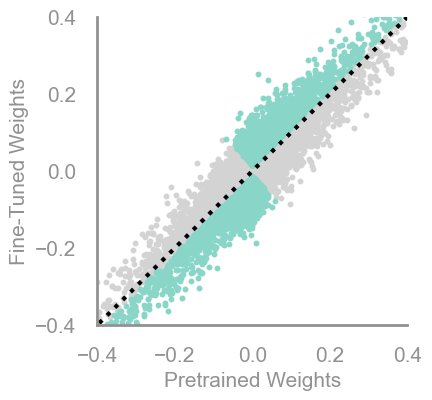

In [28]:
demo_model(updating_magnitude_increase)

### Updating Movement

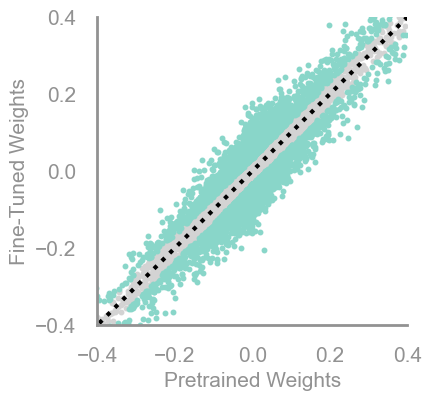

In [30]:
demo_model(updating_movement, 50)

### mov-magnitude

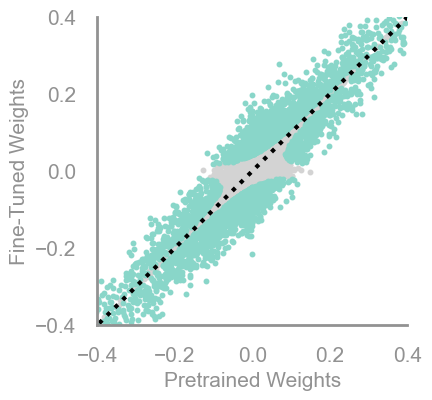

In [32]:
demo_model(movmag)

### Updating mov-magnitude

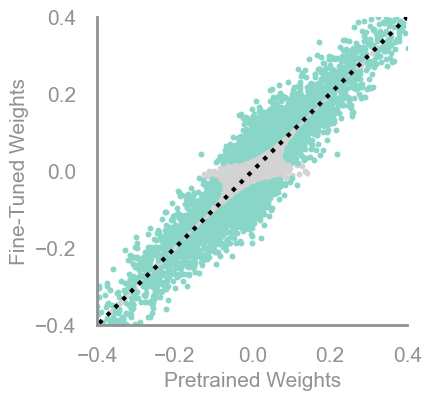

In [34]:
demo_model(updating_movmag)

In [2]:
#|output: asis
#| echo: false
show_doc(available_criterias)

---

### available_criterias

>      available_criterias ()

## Gradient Based Criteria

# New Ideas

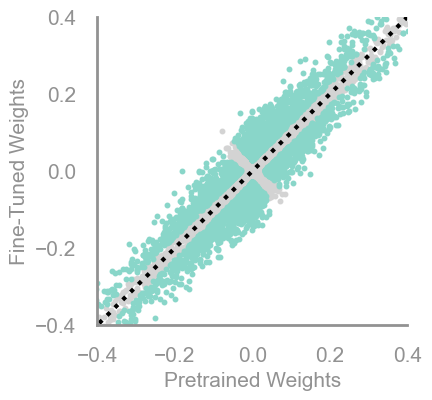

In [36]:
updating_magnitude_increase = Criteria(torch.abs, needs_update=True, output_f= lambda x,y: torch.abs(torch.sub(x,y)))

demo_model(updating_magnitude_increase)

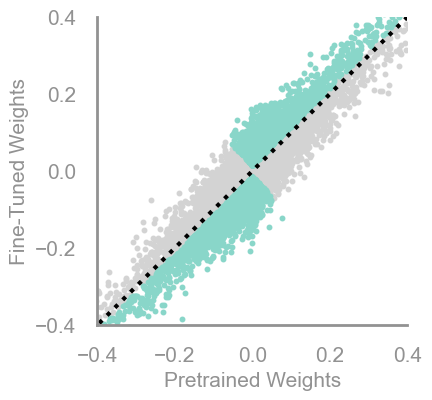

In [37]:
updating_magnitude_increase = Criteria(torch.abs, needs_update=True, output_f= lambda x,y: torch.sub(x,y))

demo_model(updating_magnitude_increase)

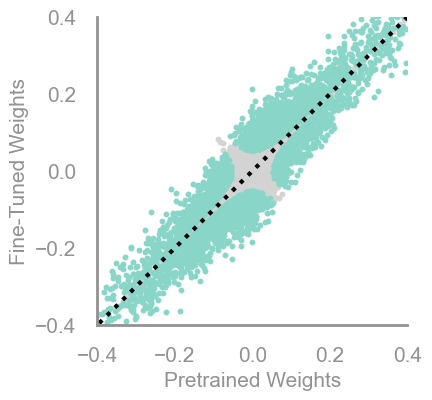

In [38]:
updating_magnitude_increase = Criteria(torch.square, needs_update=True, output_f= lambda x,y: torch.abs(torch.sub(x,y)))

demo_model(updating_magnitude_increase)

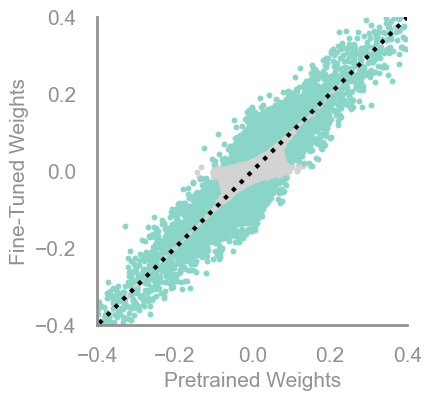

In [39]:
updating_movmag = Criteria(noop, needs_update=True, output_f=lambda x,y: torch.abs(torch.mul(x, torch.sub(x,y))))
demo_model(updating_movmag)

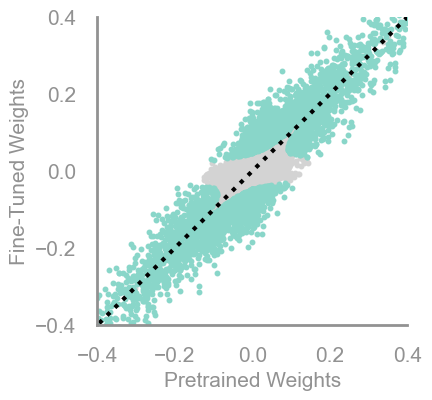

In [40]:
updating_movmag = Criteria(noop, needs_update=True, output_f=lambda x,y: torch.abs(torch.mul(torch.square(x), torch.sub(x,y))))
demo_model(updating_movmag)

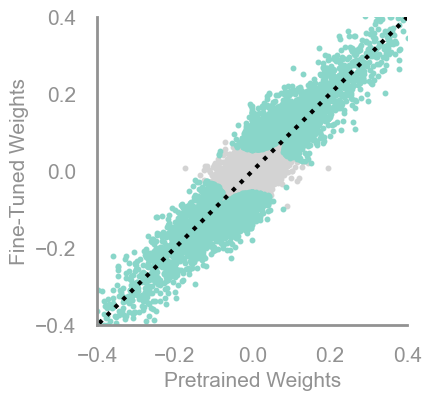

In [41]:
updating_movmag = Criteria(torch.square, needs_update=True, output_f=lambda x,y: torch.abs(torch.mul(x, torch.sub(x,y))))
#updating_movmag = Criteria(noop, needs_update=True, output_f=lambda x,y: torch.mul(x, torch.sub(x,y)))
demo_model(updating_movmag)

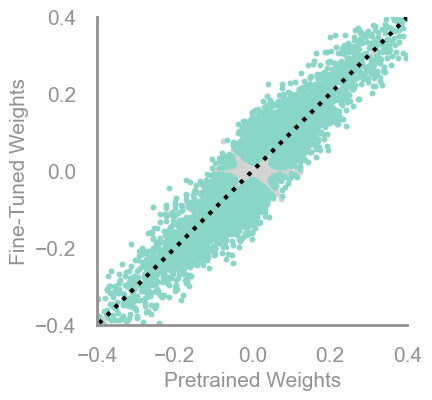

In [42]:
updating_movmag = Criteria(torch.abs, needs_update=True, output_f=lambda x,y: torch.abs(torch.mul(x, torch.sub(x,y))))
#updating_movmag = Criteria(noop, needs_update=True, output_f=lambda x,y: torch.mul(x, torch.sub(x,y)))
demo_model(updating_movmag, 30)

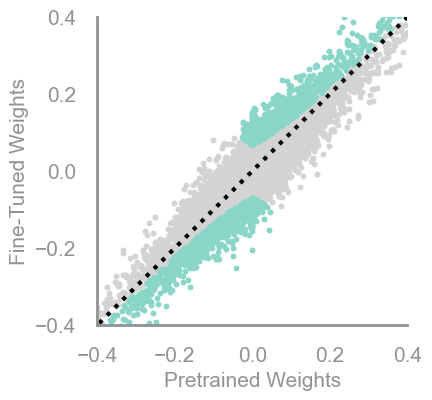

In [43]:
updating_movmag = Criteria(torch.abs, needs_update=True, output_f=lambda x,y: torch.mul(x, torch.sub(x,y)))

demo_model(updating_movmag, 80)

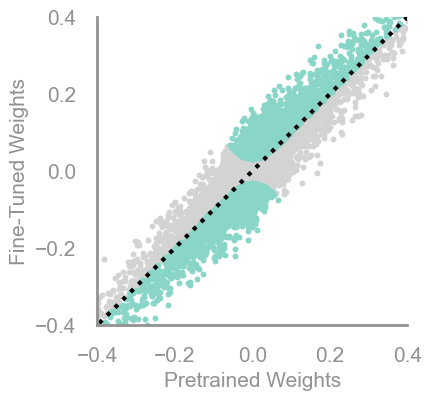

In [44]:
updating_movmag = Criteria(torch.square, needs_update=True, output_f=lambda x,y: torch.mul(x, torch.sub(x,y)))

demo_model(updating_movmag)

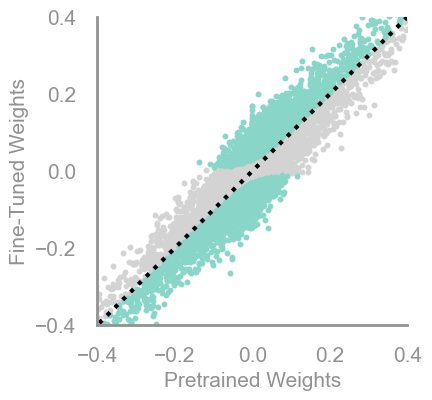

In [45]:
updating_movmag = Criteria(noop, needs_update=True, output_f=lambda x,y: torch.mul(x, torch.sub(x,y)))

demo_model(updating_movmag)

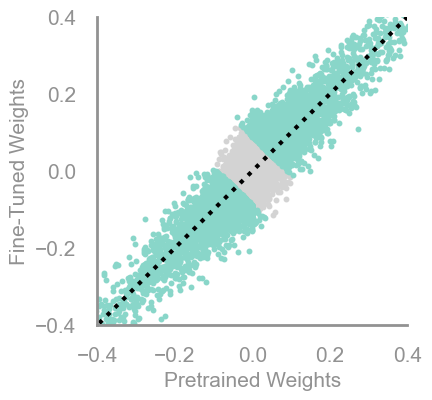

In [46]:
updating_movement = Criteria(noop, needs_update=True, output_f= lambda x,y: torch.abs(torch.sub(-x,y)))
demo_model(updating_movement, 50)

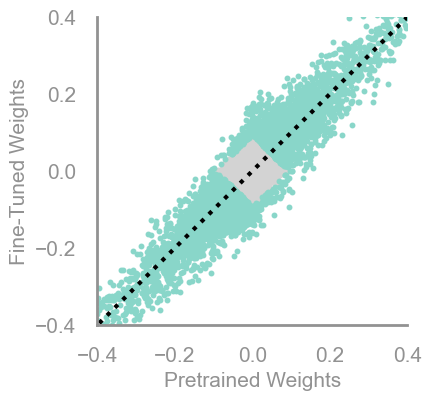

In [47]:
updating_movement = Criteria(torch.abs, needs_update=True, output_f= lambda x,y: torch.abs(torch.sub(-x,y)))
demo_model(updating_movement)

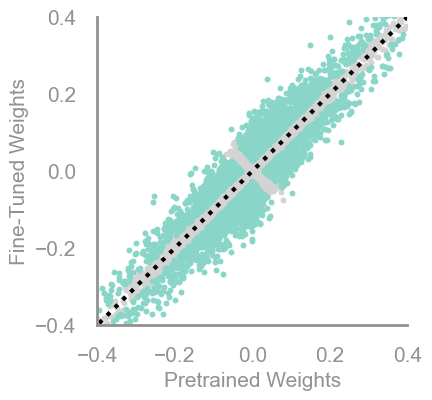

In [48]:
updating_movement = Criteria(torch.abs, needs_update=True, output_f= lambda x,y: torch.abs(torch.cosh(torch.sub(x,y))))
demo_model(updating_movement)

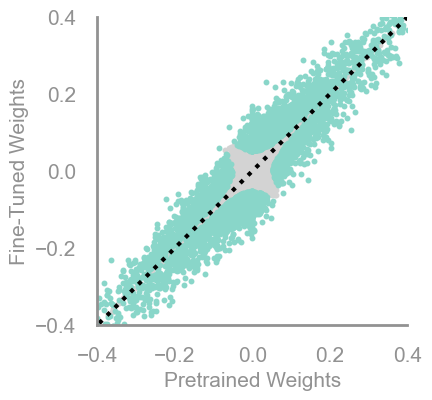

In [49]:
updating_movement = Criteria(torch.square, needs_update=True, output_f= lambda x,y: torch.abs(torch.sub(x,y)))
demo_model(updating_movement)

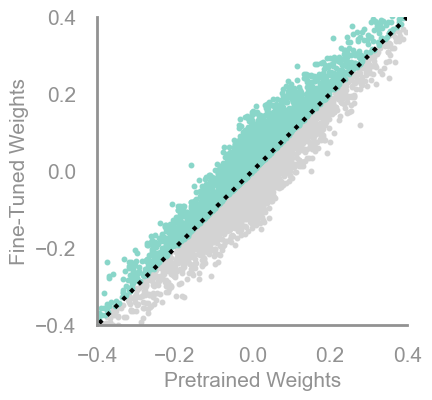

In [50]:
updating_movement = Criteria(noop, needs_update=True, output_f= lambda x,y: torch.sub(x,y))
demo_model(updating_movement)

In [51]:
mine = partial(torch.pow, exponent=4)

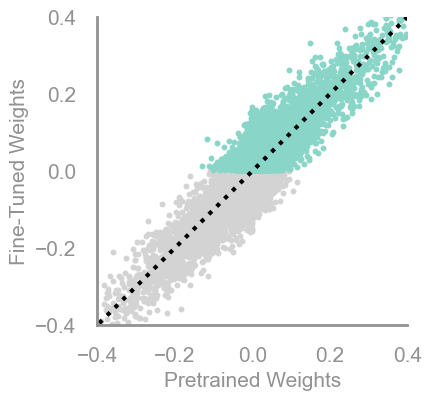

In [52]:
large_final = Criteria(torch.frac)
demo_model(large_final)

### First order Taylor expansion on the weight (as per [Nvidia Taylor Pruning](https://github.com/NVlabs/Taylor_pruning/blob/master/pruning_engine.py))

In [3]:
#|output: asis
#| echo: false
show_doc(grad_crit)

---

### grad_crit

>      grad_crit (m, g)